In [1]:
import numpy as np

#matrix = [[1000,2], [1500,3]]
matrix = [[1000, 53], [2343, 34], [432432, 32]] #[489320, 43], [4334, 32], [43, 64]]

def quiz(matrix):
    
    to_return = []
    for c in range(len(matrix[0])):
        
        column_values = list()
        
        for r in range(len(matrix)):
        
            column_values.append(matrix[r][c])
            
        minimum = min(column_values)
        maximum = max(column_values)
        
        to_add = []
        
        for r in range(len(matrix)):
            
            to_add.append((matrix[r][c] - minimum)/(maximum - minimum))
            
        to_return.append(to_add)
    
    return np.transpose(to_return)

normalized = quiz(matrix)

print(normalized)
for item in normalized:
    print(item)


[[0.         1.        ]
 [0.00311289 0.0952381 ]
 [1.         0.        ]]
[0. 1.]
[0.00311289 0.0952381 ]
[1. 0.]


In [2]:
import pandas as pd

df = pd.read_csv('SVM_Dataset2.csv')

df

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1
5,13.0,14,-1
6,14.0,12,-1
7,15.0,14,-1
8,15.0,17,-1
9,16.0,16,-1


In [3]:
x1 = df['x1']
x2 = df['x2']
X_train = np.array(list(zip(x1,x2)))
X_train

array([[ 7. , 20. ],
       [ 8. , 12. ],
       [ 9. , 19. ],
       [10. , 17. ],
       [11. , 15. ],
       [13. , 14. ],
       [14. , 12. ],
       [15. , 14. ],
       [15. , 17. ],
       [16. , 16. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [ 7. , 10. ],
       [ 8. , 10. ],
       [ 9. ,  9. ],
       [10. ,  8. ],
       [11. ,  5. ],
       [12. ,  7. ],
       [12. ,  9. ],
       [13. , 10. ]])

In [4]:
y_train = df['y'].values

print(y_train)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]


In [5]:
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
        
color_ls

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']

In [6]:
label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
        
label

['NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']

In [7]:
import matplotlib.pyplot as plt

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [38]:
from sklearn import svm

svm_classifier = svm.SVC(kernel = 'rbf', gamma = 1, C = 1000)
svm_classifier.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

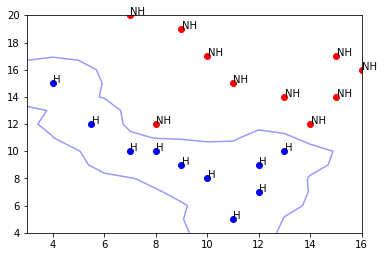

In [39]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i,j,c = color_ls[k])
    plt.text(i+0.02,j+0.02, label[k])

In [10]:
svm_classifier.predict([[3,6]])

array([1])

In [40]:
import sklearn.datasets import make_blobs
 
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples = [n_samples_1, n_samples_2],
                 centers = centers,
                 cluster_std=clusters_std,
                 random_state=0, shuffle=False)

clf = svm.SVC(kernel = 'linear', C = 1.0)
clf.fit(X,y)

wclf = svm.SVC(kernel = 'linear', C = 1.0)
wclf.fit(X,y)

plot_decision_boundary(svm_classifier, X, y)


SyntaxError: invalid syntax (<ipython-input-40-cd42c9bd2f90>, line 1)